# Linear Regression

## Using the Boston Dataset

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston
dataset = load_boston()


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [33]:
print(dataset.feature_names)


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [34]:
print(dataset.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [35]:
print(dataset.target)


[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [36]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [37]:
df['MEDV'] = dataset.target
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Data Cleansing

In [38]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [39]:
print(df.isnull().sum())


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


## Feature Selection

In [40]:
corr = df.corr()
print(corr)


             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

In [41]:
#---get the top 3 features that has the highest correlation---
print(df.corr().abs().nlargest(3, 'MEDV').index)

#---print the top 3 correlation values---
print(df.corr().abs().nlargest(3, 'MEDV').values[:,13])


Index(['MEDV', 'LSTAT', 'RM'], dtype='object')
[1.         0.73766273 0.69535995]


## Multiple Regression

Text(0, 0.5, 'MEDV')

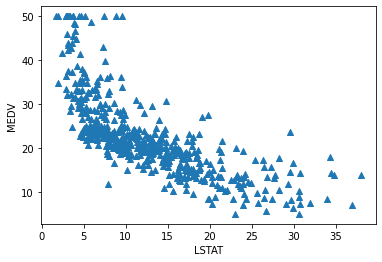

In [42]:
%matplotlib inline

plt.scatter(df['LSTAT'], df['MEDV'], marker='^')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')


Text(0, 0.5, 'MEDV')

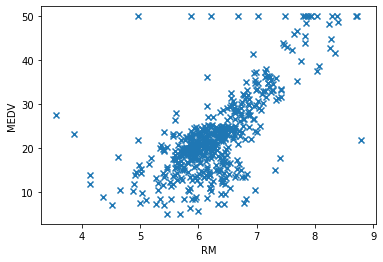

In [43]:
plt.scatter(df['RM'], df['MEDV'], marker='x')
plt.xlabel('RM')
plt.ylabel('MEDV')


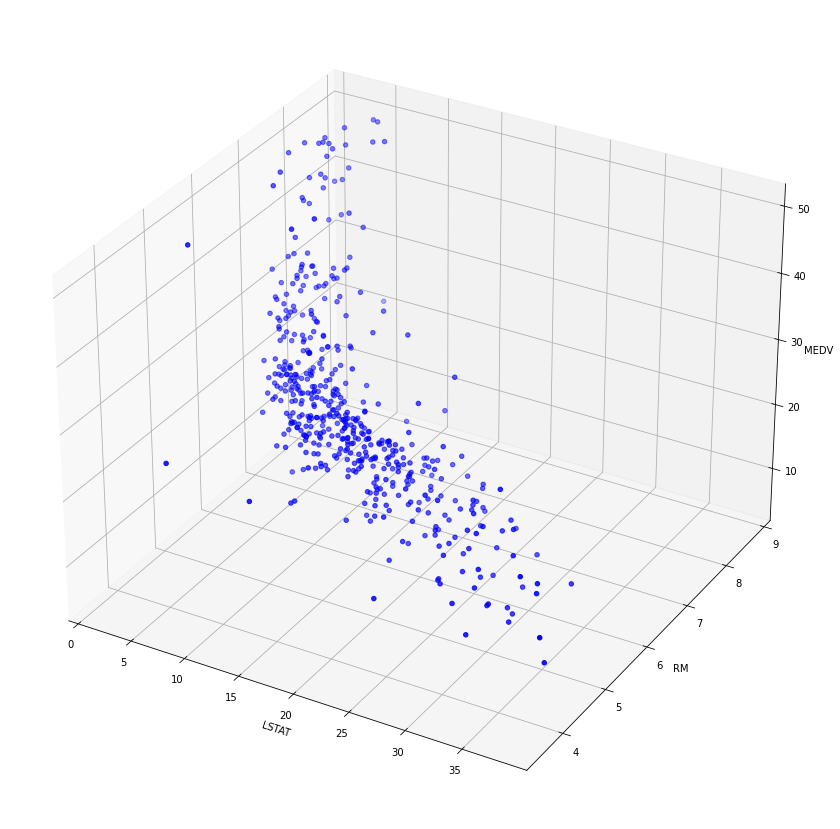

In [62]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18,15))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['LSTAT'],
           df['RM'],
           df['MEDV'],
           c='b')

ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")

plt.show()


## Training the Model

In [45]:
x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']


In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3,
                                                    random_state=5)


In [47]:
print(x_train.shape)
print(Y_train.shape)


(354, 2)
(354,)


In [48]:
print(x_test.shape)
print(Y_test.shape)


(152, 2)
(152,)


In [49]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, Y_train)


LinearRegression()

In [50]:
price_pred = model.predict(x_test)


In [51]:
print('R-squared: %.4f' % model.score(x_test,
                                      Y_test))


R-squared: 0.6162


36.494221109153244


Text(0.5, 1.0, 'Actual prices vs Predicted prices')

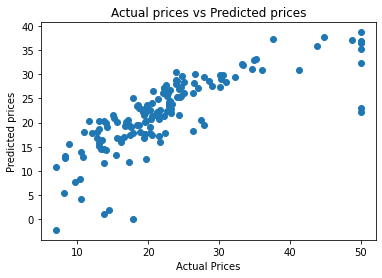

In [52]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, price_pred)
print(mse)

plt.scatter(Y_test, price_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")


## Getting the Intercept and Coefficients

In [53]:
print(model.intercept_)
print(model.coef_)


0.3843793678034899
[-0.65957972  4.83197581]


In [54]:
print(model.predict([[30,5]]))


[4.75686695]


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Plotting the 3D Hyperplane

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

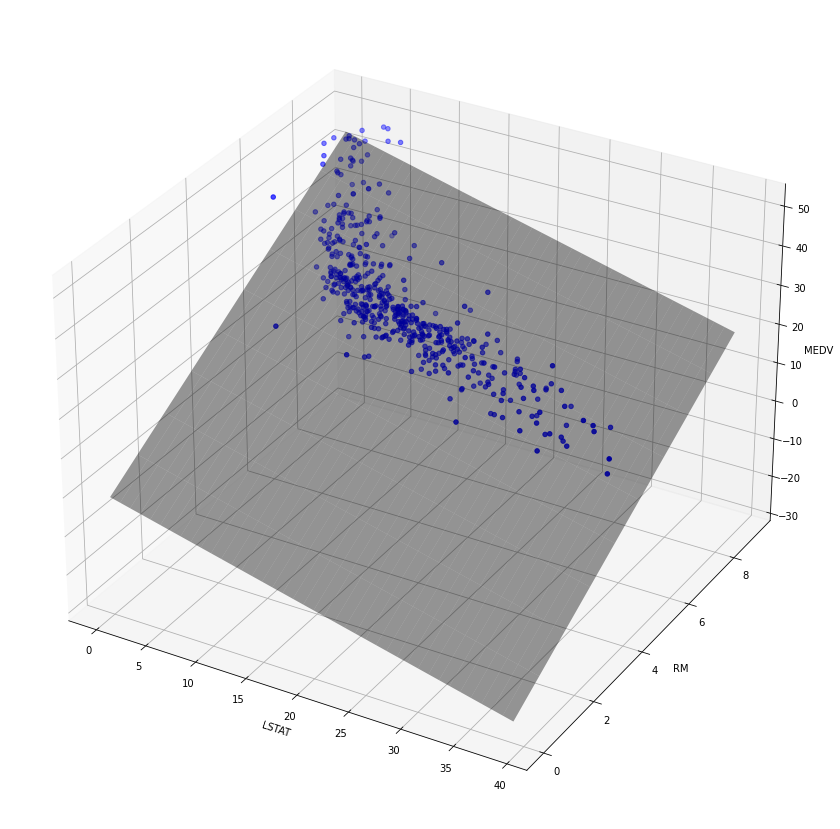

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import load_boston
dataset = load_boston()

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target

x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x['LSTAT'],
           x['RM'],
           Y,
           c='b')

ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")

#---create a meshgrid of all the values for LSTAT and RM---
x_surf = np.arange(0, 40, 1)   #---for LSTAT---
y_surf = np.arange(0, 10, 1)   #---for RM---
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, Y)

#---calculate z(MEDC) based on the model---
z = lambda x,y: (model.intercept_ + model.coef_[0] * x + model.coef_[1] * y)

ax.plot_surface(x_surf, y_surf, z(x_surf,y_surf),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)

plt.show()


# Exercises
---

1. Try the above in a python file. 

# Polynomial Regression

In [56]:
df = pd.read_csv('polynomial.csv')
plt.scatter(df.x,df.y)


FileNotFoundError: [Errno 2] No such file or directory: 'polynomial.csv'

In [ ]:
model = LinearRegression()

x = df.x[0:6, np.newaxis]     #---convert to 2D array---
y = df.y[0:6, np.newaxis]     #---convert to 2D array---

model.fit(x,y)

#---perform prediction---
y_pred = model.predict(x)

#---plot the training points---
plt.scatter(x, y, s=10, color='b')

#---plot the straight line---
plt.plot(x, y_pred, color='r')
plt.show()

#---calculate R-squared---
print('R-squared for training set: %.4f' % model.score(x,y))


## Formula for Polynomial Regression

A polynomial function of degree 1 has the following form:

Y = β0 + β1x

Quadratic regression is a degree 2 

Y = β0 + β1x + β2x2

For a polynomial of degree 3, the formula is as follows:

Y = β0 + β1x + β2x2 + β3x3

In general, a polynomial of degree n has the formula of:

Y = β0 + β1x + β2x2 + β3x3 + … + βnxn

The idea behind polynomial regression is simple — find the coefficients of the polynomial function that best fits the data.


## Polynomial Regression in Scikit-learn

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
degree = 2

polynomial_features = PolynomialFeatures(degree = degree)


In [ ]:
x_poly = polynomial_features.fit_transform(x)
print(x_poly)


In [ ]:
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

#---plot the points---
plt.scatter(x, y, s=10)

#---plot the regression line---
plt.plot(x, y_poly_pred)
plt.show()


In [ ]:
print(model.intercept_)
print(model.coef_)


In [ ]:
print('R-squared for training set: %.4f' % model.score(x_poly,y))


## Using Polynomial Multiple Regression on the Boston Dataset

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

dataset = load_boston()

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target

x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']

from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3,
                                                    random_state=5)


In [ ]:
#---use a polynomial function of degree 2---
degree = 2
polynomial_features= PolynomialFeatures(degree = degree)
x_train_poly = polynomial_features.fit_transform(x_train)


When using a polynomial function of degree 2 on two independent variables x1 and x2, the formula becomes:

Y = β0 + β1x1 + β2x2 + β3x12 + β4x1x2 +β5x22

where Y is the dependent variable, β0 is the intercept, β1, β2, β3, and β4 are the coefficients of the various combinations of the two features x1 and x2, respectively.


In [ ]:
#---print out the formula---
print(polynomial_features.get_feature_names(['x','y']))


In [ ]:
model = LinearRegression()
model.fit(x_train_poly, Y_train)


In [ ]:
x_test_poly = polynomial_features.fit_transform(x_test)
print('R-squared: %.4f' % model.score(x_test_poly,
                                      Y_test))


In [ ]:
print(model.intercept_)
print(model.coef_)


With these values, the formula now becomes:

Y = β0 + β1x1 + β2x2 + β3x12 + β4x1x2 +β5x22

Y = 26.9334305238 + 1.47424550e+00 x1 + (-6.70204730e+00) x2 + 7.93570743e-04 x12 + (-3.66578385e-01) x1x2 + 1.17188007e+00 x22


## Plotting the 3D Hyperplane

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

dataset = load_boston()

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target

x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x['LSTAT'],
           x['RM'],
           Y,
           c='b')

ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")

#---create a meshgrid of all the values for LSTAT and RM---
x_surf = np.arange(0, 40, 1)   #---for LSTAT---
y_surf = np.arange(0, 10, 1)   #---for RM---
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

#---use a polynomial function of degree 2---
degree = 2
polynomial_features= PolynomialFeatures(degree = degree)
x_poly = polynomial_features.fit_transform(x)
print(polynomial_features.get_feature_names(['x','y']))

#---apply linear regression---
model = LinearRegression()
model.fit(x_poly, Y)

#---calculate z(MEDC) based on the model---
z = lambda x,y: (model.intercept_ +
                (model.coef_[1] * x) +
                (model.coef_[2] * y) +
                (model.coef_[3] * x**2) +
                (model.coef_[4] * x*y) +
                (model.coef_[5] * y**2))

ax.plot_surface(x_surf, y_surf, z(x_surf,y_surf),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)

plt.show()


# Exercises
---

1. Try the above in a python file.